In [ ]:
#Description: Sentinment Analysis Program that parses the tweeter using Python



In [13]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install tweepy

In [ ]:
pip install textblob

In [ ]:
pip install wordcloud

In [ ]:
data_ukraine=pd.read_csv(r'/Users/harshsomani/Downloads/Data-Ukraine/combined.csv')

In [ ]:
data_ukraine.head()

In [ ]:
 columns=["text","language"]
 data_en=data_ukraine[columns]   

In [ ]:
data_en=data_en[data_en["language"]=="en"]
data_en.reset_index(drop=True,inplace=True)
data_en.shape                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:

from bs4 import BeautifulSoup
from html import unescape

In [ ]:
pip install bs4

In [ ]:
def remove_urls(x):
    cleaned_string=re.sub('r(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b','',str(x),flags=re.MULTILINE)
    return cleaned_string

In [ ]:
def unescape_stuff(x):
    soup =BeautifulSoup(unescape(x),'lxml')
    return soup.text


In [ ]:
def deEmojify(x):
    regrex_pattern=re.compile(pattern="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
data_en['text']=data_en['text'].str.lower()

In [ ]:
import swifter
data_en['text']=data_en['text'].swifter.apply(remove_urls)

In [ ]:
pip install swifter

In [12]:
data_en['text']=data_en['text'].swifter.apply(unescape)

In [14]:
data_en['text']=data_en['text'].swifter.apply(deEmojify)

Pandas Apply:   0%|          | 0/9301920 [00:00<?, ?it/s]

In [16]:
import spacy
import nltk

In [17]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sp = spacy.load('en_core_web_sm')
cachedStopWords=sp.Defaults.stop_words
cachedStopWords=[x.lower() for x in cachedStopWords]
def remove_stopwords(x):
    meaningful_words=[]
    my_list=x
    
    tokenized_my_list=word_tokenize(my_list)
    meaningful_words=[w for w in tokenized_my_list if not w in cachedStopWords]
    return " ".join(meaningful_words) 

In [ ]:
pip install spaCy

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
import en_core_web_sm as en

In [ ]:
nltk.download('punkt')

In [19]:
data_en['text']=data_en['text'].swifter.apply(remove_stopwords)


Pandas Apply:   0%|          | 0/9301920 [00:00<?, ?it/s]

In [ ]:
data_en['text'].head()

In [20]:
data_en['text']=data_en['text'].str.findall('\w{2,}').str.join(' ')

In [21]:
tweet_string_list=data_en['text'].tolist()
tweet_string=' '.join(tweet_string_list) 

In [25]:
from wordcloud import WordCloud
wordCloud=WordCloud(width=2000,height=1334,random_state=1,background_color='black',colormap='Pastel1',max_words=100,collocations=False,normalize_plurals=False).generate(tweet_string)

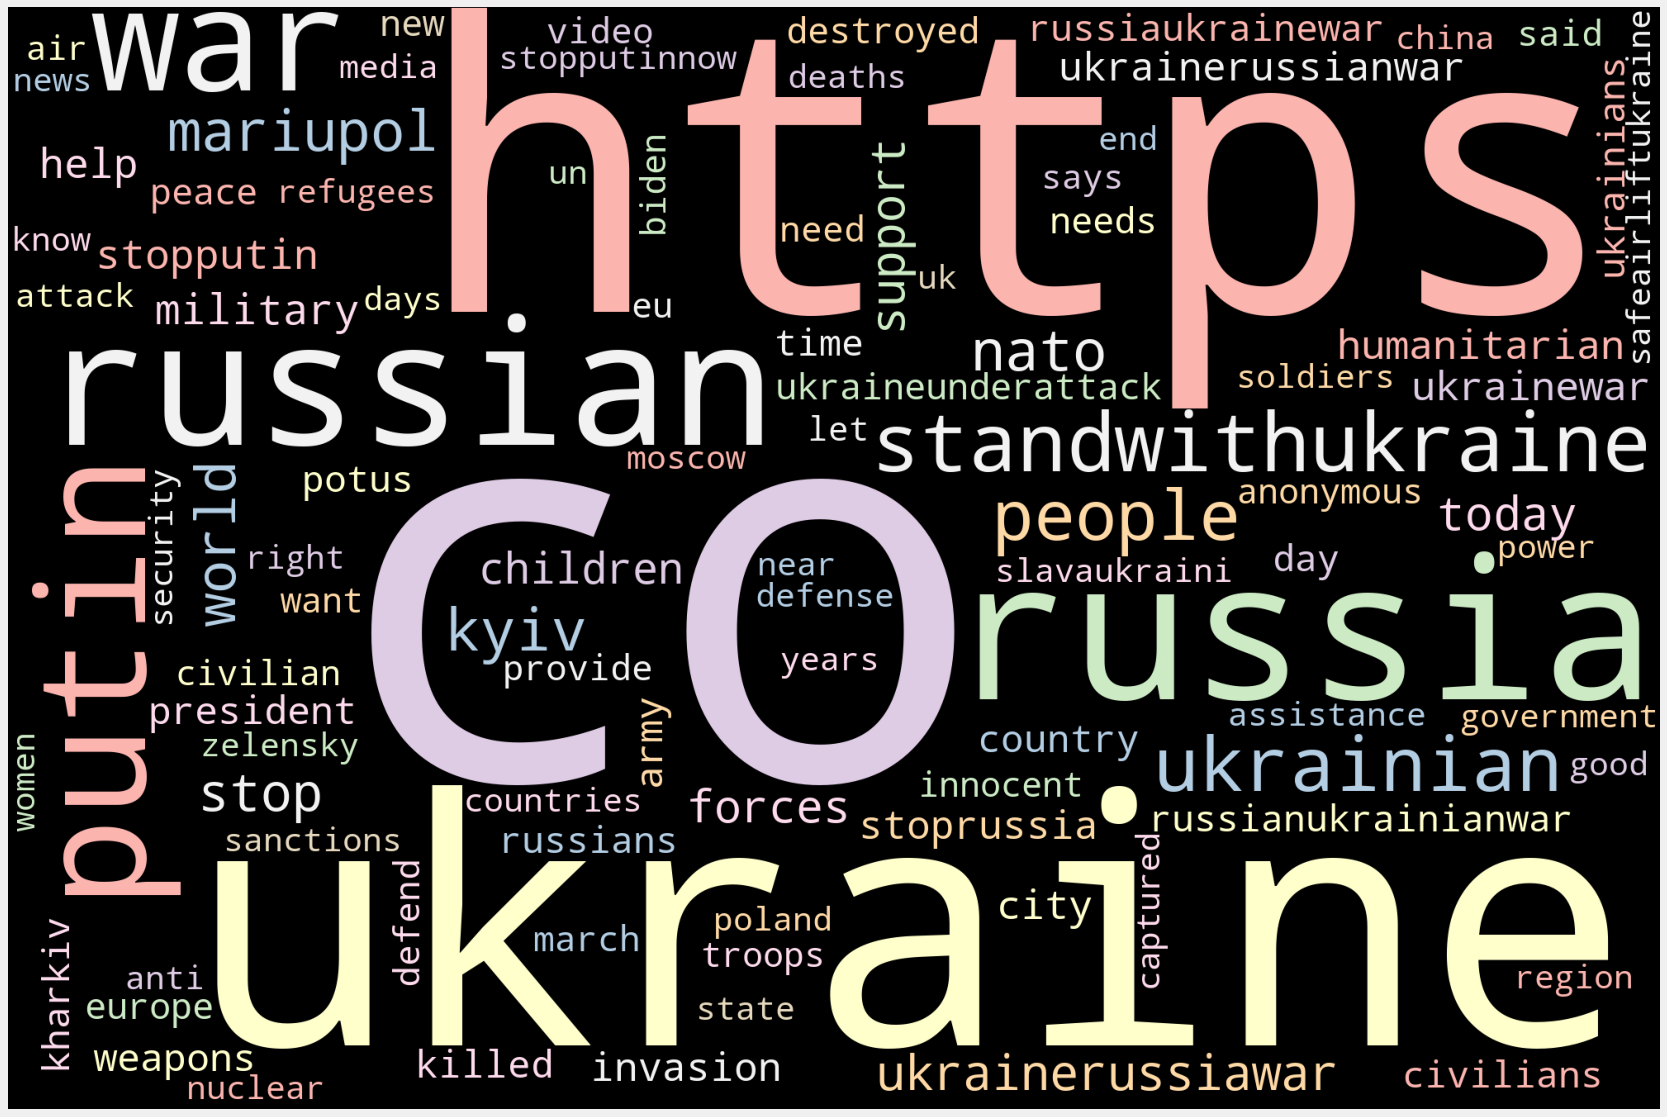

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
def plot_cloud(wordcloud):
    fig=plt.figure(figsize=(25,17),dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()
plot_cloud(wordCloud)    